In [22]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi,sin,cos,sqrt,exp,log

Практична №4
<ul>    
<li>Реалізувати алгоритм інтерполяції таблично заданої функції кубічними сплайнами. </li>
<li>Обчислити похибку інтерполяції для різної кількості рівновіддалених вузлів, а також між рівною кількістю рівновіддаленими вузлами та вузілами Чебишева.</li>
<li>Вивести отримані числові дані, намалювати графіки функції, та інтерполіційних сплайнів</li>
</ul>



${S_i}(x_i) = {S_{i+1}}(x_i) = y_i$

${S_i}'(x_i) = {S_{i+1}}'(x_i) = y_i$

${S_i}''(x_i) = {S_{i+1}}''(x_i) = y_i$

In [23]:
def cubic_spline(x, y):
    """
    Returns coefficients:
    b, coefficient of x of degree 1
    c, coefficient of x of degree 2
    d, coefficient of x of degree 3
    """
    x = np.array(x)
    y = np.array(y)

    size = len(x)
    delta_x = np.diff(x) #differences between elements of list x
    delta_y = np.diff(y)

    # Get matrix A
    A = np.zeros(shape=(size, size))
    A[0, 0] = 1
    A[-1, -1] = 1# continuity of second derivative 

    for i in range(1, size - 1):
        A[i, i - 1] = delta_x[i - 1] #lower
        A[i, i + 1] = delta_x[i] #upper
        A[i, i] = 2 * (delta_x[i - 1] + delta_x[i]) #center

 
    b = np.zeros(shape=(size, 1))
    
    b[1:-1, 0] = 3 * (delta_y[1:] / delta_x[1:] - delta_y[:-1] / delta_x[:-1])
    
 
    c = np.linalg.solve(A, b)
    d = np.zeros(shape = (size-1,1))
    b = np.zeros(shape = (size-1,1))

    for i in range(0,len(d)):
        d[i] = (c[i+1] - c[i]) / (3*delta_x[i])
        b[i] = (delta_y[i]/delta_x[i]) - (delta_x[i]/3)*(2*c[i] + c[i+1])    

    return b.squeeze(), c.squeeze(), d.squeeze()

$ b_i = 3 \left( \frac{\Delta y_{i+1}}{\Delta x_{i+1}} - \frac{\Delta y_i}{\Delta x_i} \right) $

$ d_i = \frac{{c_{i+1} - c_i}}{{3 \cdot \Delta x_i}} $

$ b_i = \frac{{\Delta y_i}}{{\Delta x_i}} - \frac{{\Delta x_i}}{{3}} (2c_i + c_{i+1}) $


In [24]:
def get_cur_y(x_interval,y_interval,x_to_interpol):
    x_val = x_interval.copy()
    y_val = y_interval.copy()
    b,c,d = cubic_spline(x_val,y_val)
    interval = None
    for i in range(0,len(x_val)-1):
        if x_val[i] <= x_to_interpol <= x_val[i+1]:
            interval = (i,i+1)
            break
    if not interval:
        raise Exception('x is out of range')
    index = interval[0]
    
    to_return = y_val[index] + b[index] * (x_to_interpol - x_val[index]) + c[index] * (x_to_interpol - x_val[index]) ** 2 + d[index] * (x_to_interpol - x_val[index]) ** 3
    
    return to_return

${S(x) = a+b\cdot(x-x_{0})+c\cdot(x-x_{0})^2+ d\cdot(x-x_{0})^3}$

у вузлах значення співпадають

перша друга похідна існуюють і неперервні

$ g''(a) = g''(b) =0 $

In [25]:
def chebyshev_nodes(a, b, n):
  
    i = np.array(range(n))
    x = np.cos((2*i+1)*pi/(2*(n))) 
    return 0.5*(b-a)*x+0.5*(b+a) 

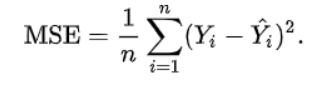

In [26]:
def mse(f,x,y_interpol):
    sum=0
    n = len(x)
    for i in range(n):
        sum+= (eval(f,{'x':x[i],'sin':sin,'cos':cos,'log':log,'sqrt':sqrt,'exp':exp}) - y_interpol[i])**2

    return sum/n
    

In [27]:
# f= 'sin(x)*log(x)'
# x_values = [0.3522,2.1276,4.843,7.915,11.033]
# y_values = [-0.36,0.641,-1.5641,2.065,-2.399]

# f = 'x**3 +5*(x**2) +x'
# x_values = [-5, -3.23, 0, 1]
# y_values = [-5, 15.236, 0, 7]

# f = '-4*(x**3)+5*(x**2)+x'
# x_values = [-0.5,-0.09,0.924,1.425]
# y_values = [1.25,-0.047,2.037,0]

# y h n

Error:                0.0002854511326972874
Chebyshev node error: 0.0005125566712972421


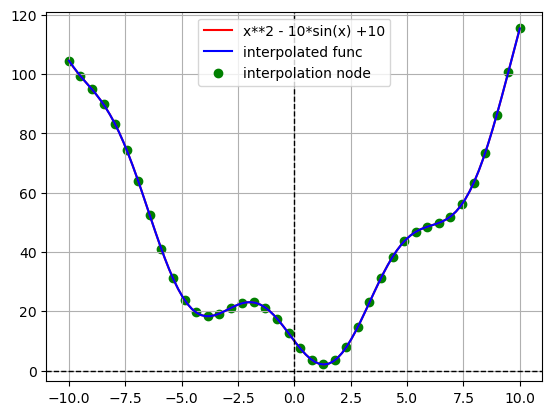

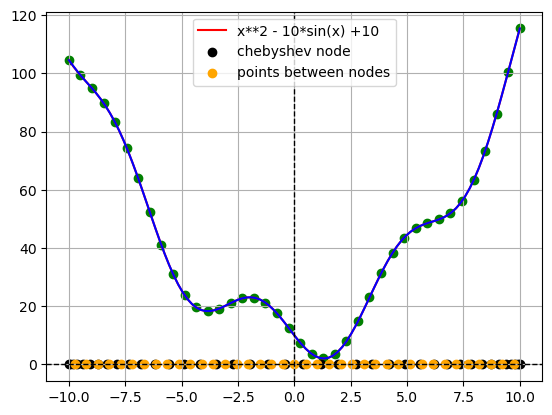

In [28]:
f= 'sin(x)*log(x)'
f = input('Enter f')
n = int(input('Enter n'))

# x_values = [0.3522,2.1276,4.843,7.915,11.033]
# y_values = [-0.36,0.641,-1.5641,2.065,-2.399]
start = float(input('Start'))
end = float(input('End'))


x_values = np.linspace(start,end,n)
y_values = [eval(f,{'x':i,'sin':sin,'cos':cos,'log':log,'sqrt':sqrt,'exp':exp}) for i in x_values]

length = len(x_values)
left = x_values[0]
right = x_values[-1]

myx = np.linspace(left,right,100)
myy = [eval(f,{'x':i,'sin':sin,'cos':cos,'log':log,'sqrt':sqrt,'exp':exp}) for i in myx]
plt.plot(myx,myy,color='red',label=f'{f}')
x_int = np.linspace(left,right,100)
y_int = [get_cur_y(x_values,y_values,i) for i in x_int]
plt.plot(x_int,y_int,color = 'blue',label='interpolated func')
plt.scatter(x_values,y_values,color='green',label = 'interpolation node')
plt.grid(True)
plt.axhline(0, color='black', linewidth=1,linestyle='dashed')
plt.axvline(0, color='black', linewidth=1,linestyle='dashed')


btween_val = []

# values between nodes
for i in range(len(x_values) - 1):
    x_btw = (x_values[i] + x_values[i + 1]) / 2
    btween_val.append(x_btw)


err_range = btween_val
err_interpol = [get_cur_y(x_values,y_values,i) for i in err_range]
print(f'Error: {mse(f,err_range,err_interpol):>36}')

#plt.scatter(btween_val,[0 for i in btween_val])

chebyshev_list = chebyshev_nodes(left,right,length)
chebyshev_interpol = [get_cur_y(x_values,y_values,i) for i in chebyshev_list]
#plt.scatter(chebyshev_list,chebyshev_interpol, label='cbcev', color ='blue')
print(f'Chebyshev node error: {mse(f,chebyshev_list,chebyshev_interpol):>20}')
plt.legend()
plt.show()



########
plt.plot(myx,myy,color='red',label=f'{f}')
plt.plot(x_int,y_int,color = 'blue')
plt.scatter(x_values,y_values,color='green')
plt.grid(True)
plt.axhline(0, color='black', linewidth=1,linestyle='dashed')
plt.axvline(0, color='black', linewidth=1,linestyle='dashed')
plt.scatter(chebyshev_list,[0 for i in chebyshev_list],label='chebyshev node',color='black')
plt.scatter(btween_val,[0 for i in btween_val],label='points between nodes', color='orange')
plt.legend()
plt.show()


#sin(x)*log(x)
